## Importar Librerías

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Cargar data

In [5]:
filename= "/home/diegopalma/Documents/rle_127/solo12-pybullet/telemetria/data_prueba.csv"
data = pd.read_csv(filename)
data[["FR"]] = data[["FR"]].abs()
data[["FL"]] = data[["FL"]].abs()
data[["BR"]] = data[["BR"]].abs()
data[["BL"]] = data[["BL"]].abs()
data.head(5)

,t,FR,FL,BR,BL,n_FR,n_FL,n_BR,n_BL,t_FL_HAA,...,z_FR,x_FL,y_FL,z_FL,x_HR,y_HR,z_HR,x_HL,y_HL,z_HL
0,0.004938,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,...,0.0,0.19,0.147,0.0,-0.19,-0.147,0.0,-0.19,0.147,0.0
1,0.009273,0.336385,0.349160,0.336487,0.349055,3.039866,0.349160,11.061017,10.640808,-2.098668,...,0.0,0.19,0.147,0.0,-0.19,-0.147,0.0,-0.19,0.147,0.0
2,0.012067,0.213121,0.221299,0.213058,0.221364,6.857768,6.526321,2.120490,0.221364,-1.416280,...,0.0,0.19,0.147,0.0,-0.19,-0.147,0.0,-0.19,0.147,0.0
3,0.016037,0.049139,0.054044,0.049174,0.054007,1.445076,0.054044,3.582886,3.279050,-0.905302,...,0.0,0.19,0.147,0.0,-0.19,-0.147,0.0,-0.19,0.147,0.0
4,0.022240,0.007049,0.010083,0.007031,0.010101,2.229255,2.031178,0.919447,0.010101,-0.523857,...,0.0,0.19,0.147,0.0,-0.19,-0.147,0.0,-0.19,0.147,0.0


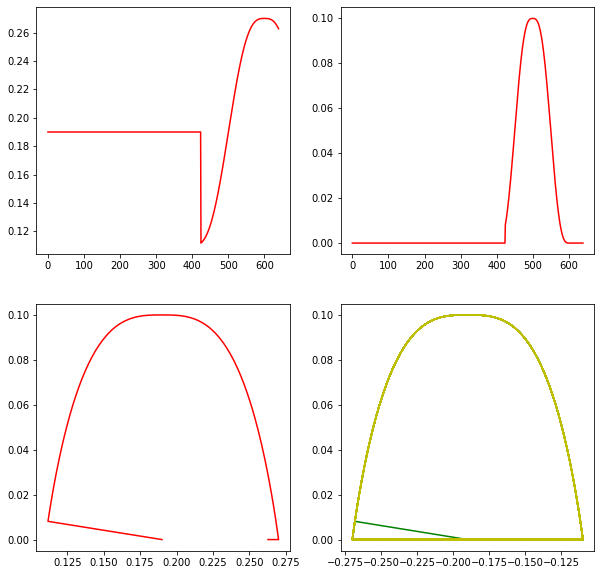

In [43]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

a = 640
axs[0,0].plot(data[["x_FL"]][0:a],'r')
#axs[0,0].plot(data[["t"]], data[["x_FL"]],'b')
#axs[0,0].plot(data[["t"]], data[["x_HR"]],'g')
#axs[0,0].plot(data[["t"]], data[["x_HL"]],'y')

axs[0,1].plot(data[["z_FL"]][0:a],'r')
#axs[0,1].plot(data[["t"]], data[["z_FL"]],'b')
#axs[0,1].plot(data[["t"]], data[["z_HR"]],'g')
#axs[0,1].plot(data[["t"]], data[["z_HL"]],'y')

axs[1,0].plot(data[["x_FL"]][0:a], data[["z_FL"]][0:a],'r')
#axs[1,0].plot(data[["x_FL"]][0:500], data[["z_FL"]][0:500],'b')
axs[1,1].plot(data[["x_HR"]], data[["z_HR"]],'g')
axs[1,1].plot(data[["x_HL"]], data[["z_HL"]],'y')


plt.show()

In [37]:
def plot_data(data, axs, ix, iy, colx, coly, xlab, ylab, tit):
    axs[ix,iy].plot(data[[colx]], data[[coly]])
    axs[ix,iy].set_xlabel(xlab)
    axs[ix,iy].set_ylabel(ylab)
    axs[ix,iy].set_title(tit)

## Grafica la fuerza de contacto en el eje Z de cada pata

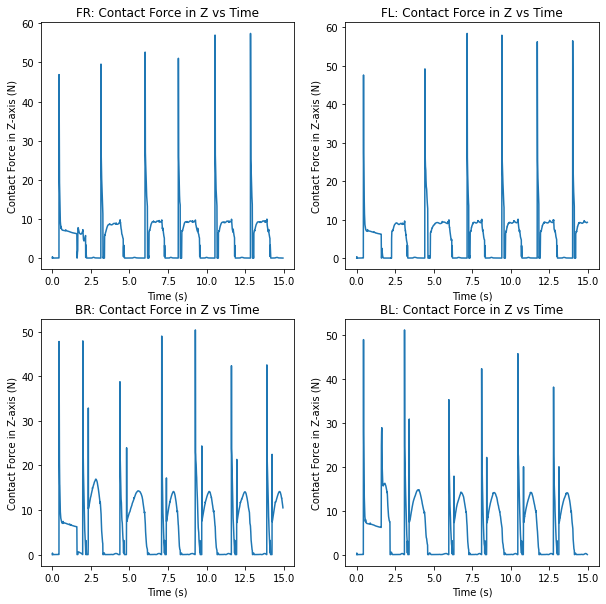

In [103]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
# Fuerza en FR
plot_data(data, axs, 0, 0, "t", "FR", "Time (s)", "Contact Force in Z-axis (N)", "FR: Contact Force in Z vs Time")
# Fuerza en FL
plot_data(data, axs, 0, 1, "t", "FL", "Time (s)", "Contact Force in Z-axis (N)", "FL: Contact Force in Z vs Time")
# Fuerza en BR
plot_data(data, axs, 1, 0, "t", "BR", "Time (s)", "Contact Force in Z-axis (N)", "BR: Contact Force in Z vs Time")
# Fuerza en BL
plot_data(data, axs, 1, 1, "t", "BL", "Time (s)", "Contact Force in Z-axis (N)", "BL: Contact Force in Z vs Time")

plt.show()

## Graficar fuerza de contacto absoluta

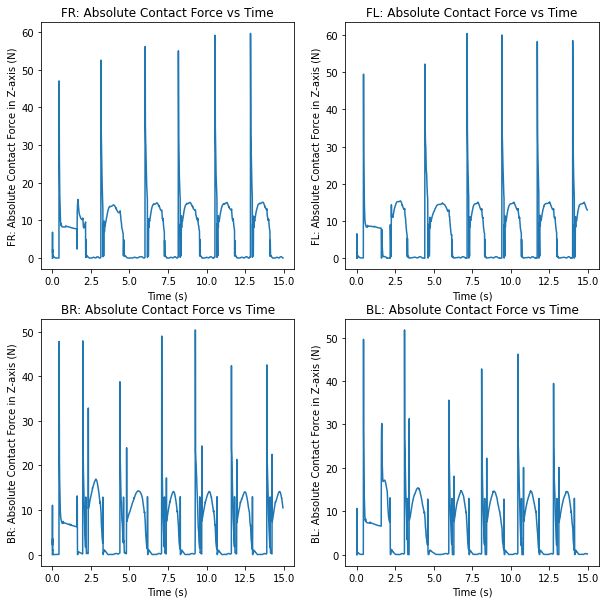

In [104]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
# Fuerza en FR
plot_data(data, axs, 0, 0, "t", "n_FR", "Time (s)", "FR: Absolute Contact Force in Z-axis (N)", "FR: Absolute Contact Force vs Time")
# Fuerza en FL
plot_data(data, axs, 0, 1, "t", "n_FL", "Time (s)", "FL: Absolute Contact Force in Z-axis (N)", "FL: Absolute Contact Force vs Time")
# Fuerza en BR
plot_data(data, axs, 1, 0, "t", "n_BR", "Time (s)", "BR: Absolute Contact Force in Z-axis (N)", "BR: Absolute Contact Force vs Time")
# Fuerza en BL
plot_data(data, axs, 1, 1, "t", "n_BL", "Time (s)", "BL: Absolute Contact Force in Z-axis (N)", "BL: Absolute Contact Force vs Time")

plt.show()

## Estadísticas

In [105]:
def estadisticas_fuerza(data,col):
    stats = []
    stats.append(data[[col]][500::].mean()[0])
    stats.append(data[[col]][500::].max()[0])
    stats.append(data[[col]][500::].min()[0])
    print("media",col,":",stats[0])
    print("max",col,":",stats[1])
    print("min",col,":",stats[2])
    return stats

In [106]:
estadisticas_fuerza(data, "FR")
estadisticas_fuerza(data, "FL")
estadisticas_fuerza(data, "BR")
estadisticas_fuerza(data, "BL")

media FR : 4.972250591539164
max FR : 57.4024152225972
min FR : 0.0
media FL : 5.1769369481758165
max FL : 58.44346075908546
min FL : 0.0
media BR : 5.979850659394674
max BR : 50.38320401627457
min BR : 0.0
media BL : 5.561736793438463
max BL : 51.26476154062145
min BL : 0.0


[5.561736793438463, 51.26476154062145, 0.0]

## Graficar torque en las articulaciones

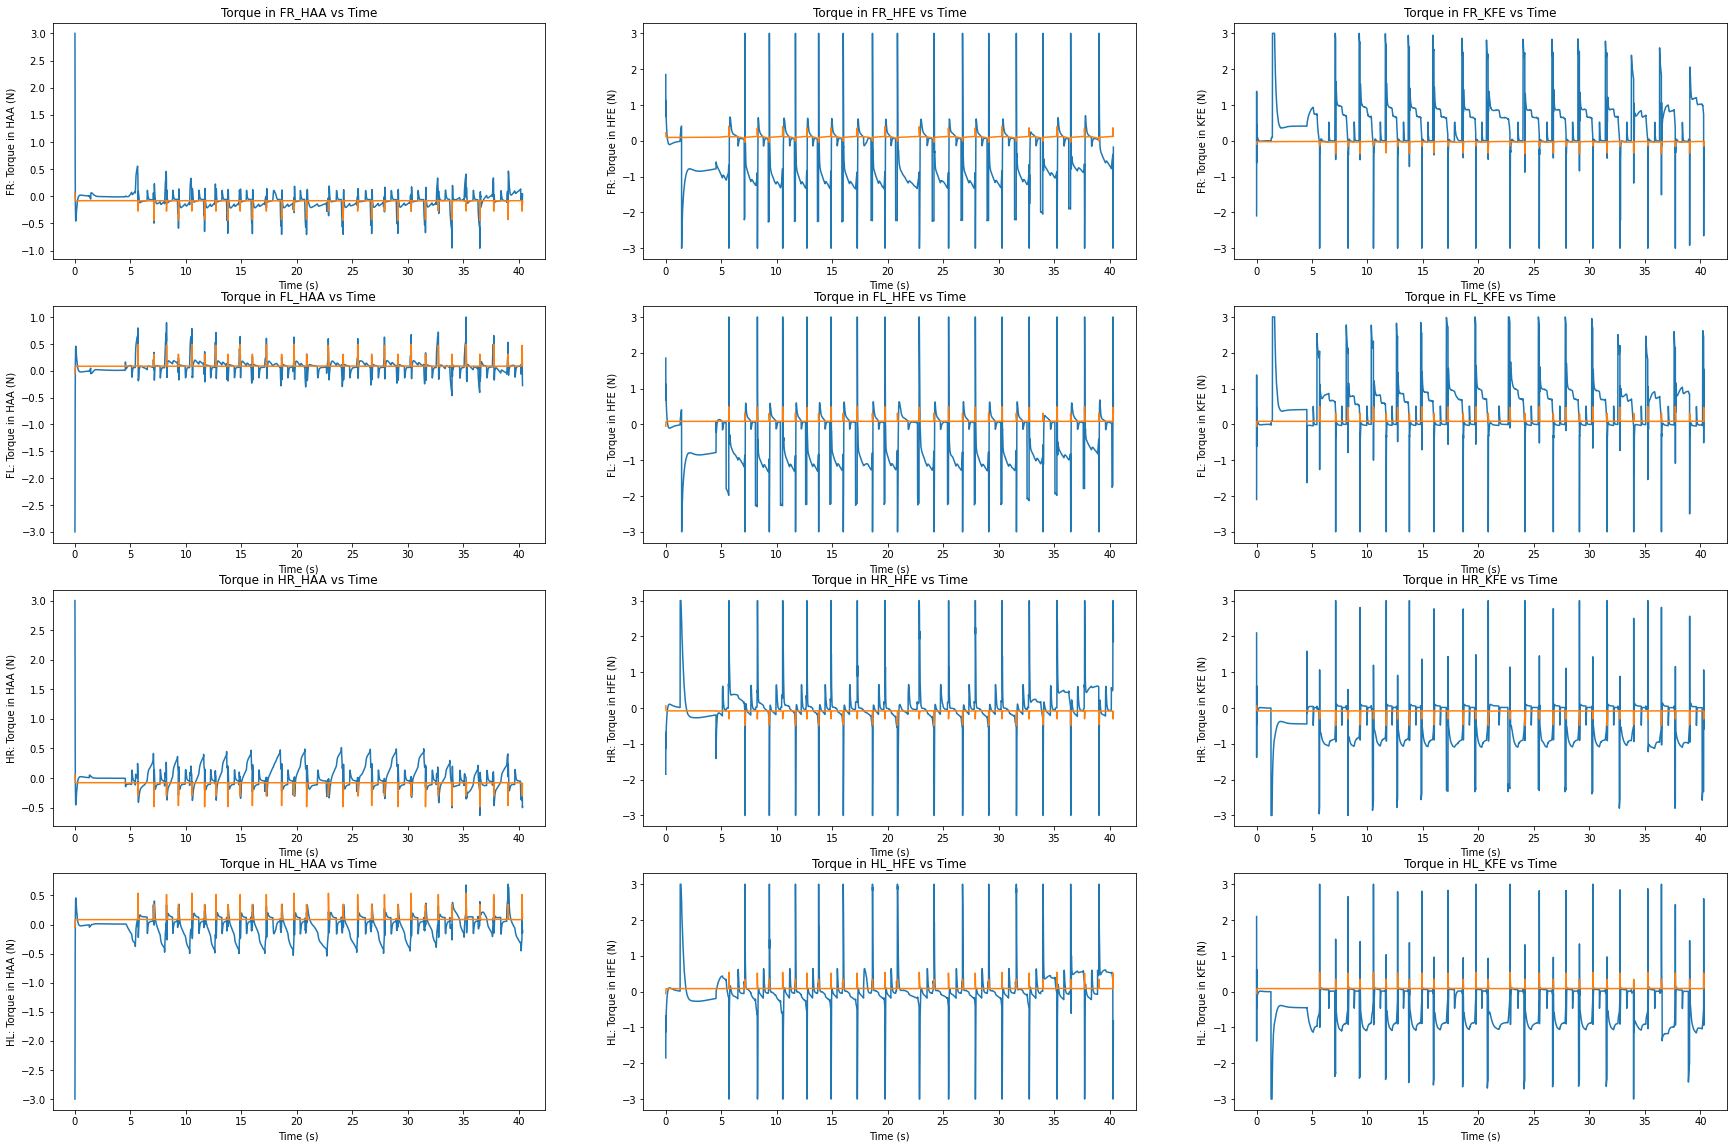

In [84]:
fig, axs2 = plt.subplots(4, 3, figsize=(30,20))

# Torque en FR_HAA
plot_data(data, axs2, 0, 0, "t", "t_FR_HAA", "Time (s)", "FR: Torque in HAA (N)", "Torque in FR_HAA vs Time")
axs2[0,0].plot(data["t"], data[["tref_FR_HAA"]])
# Torque en FR_HFE
plot_data(data, axs2, 0, 1, "t", "t_FR_HFE", "Time (s)", "FR: Torque in HFE (N)", "Torque in FR_HFE vs Time")
axs2[0,1].plot(data["t"], data[["tref_FR_HFE"]])
# Torque en FR_KFE
plot_data(data, axs2, 0, 2, "t", "t_FR_KFE", "Time (s)", "FR: Torque in KFE (N)", "Torque in FR_KFE vs Time")
axs2[0,2].plot(data["t"], data[["tref_FR_KFE"]])

# Torque en FR_HAA
plot_data(data, axs2, 1, 0, "t", "t_FL_HAA", "Time (s)", "FL: Torque in HAA (N)", "Torque in FL_HAA vs Time")
axs2[1,0].plot(data["t"], data[["tref_FL_HAA"]])
# Torque en FR_HFE
plot_data(data, axs2, 1, 1, "t", "t_FL_HFE", "Time (s)", "FL: Torque in HFE (N)", "Torque in FL_HFE vs Time")
axs2[1,1].plot(data["t"], data[["tref_FL_HAA"]])
# Torque en FR_KFE
plot_data(data, axs2, 1, 2, "t", "t_FL_KFE", "Time (s)", "FL: Torque in KFE (N)", "Torque in FL_KFE vs Time")
axs2[1,2].plot(data["t"], data[["tref_FL_HAA"]])

# Torque en FR_HAA
plot_data(data, axs2, 2, 0, "t", "t_HR_HAA", "Time (s)", "HR: Torque in HAA (N)", "Torque in HR_HAA vs Time")
axs2[2,0].plot(data["t"], data[["tref_HR_HAA"]])
# Torque en FR_HFE
plot_data(data, axs2, 2, 1, "t", "t_HR_HFE", "Time (s)", "HR: Torque in HFE (N)", "Torque in HR_HFE vs Time")
axs2[2,1].plot(data["t"], data[["tref_HR_HAA"]])
# Torque en FR_KFE
plot_data(data, axs2, 2, 2, "t", "t_HR_KFE", "Time (s)", "HR: Torque in KFE (N)", "Torque in HR_KFE vs Time")
axs2[2,2].plot(data["t"], data[["tref_HR_HAA"]])

# Torque en FR_HAA
plot_data(data, axs2, 3, 0, "t", "t_HL_HAA", "Time (s)", "HL: Torque in HAA (N)", "Torque in HL_HAA vs Time")
axs2[3,0].plot(data["t"], data[["tref_HL_HAA"]])
# Torque en FR_HFE
plot_data(data, axs2, 3, 1, "t", "t_HL_HFE", "Time (s)", "HL: Torque in HFE (N)", "Torque in HL_HFE vs Time")
axs2[3,1].plot(data["t"], data[["tref_HL_HAA"]])
# Torque en FR_KFE
plot_data(data, axs2, 3, 2, "t", "t_HL_KFE", "Time (s)", "HL: Torque in KFE (N)", "Torque in HL_KFE vs Time")
axs2[3,2].plot(data["t"], data[["tref_HL_HAA"]])

plt.show()